# Table of Contents

1. [Multi-class Classification](#multi-class)
    1. [Dataset](#dataset)
    2. [Visualizing the data](#visualizing)
    3. [Vectorizing Logistic Regression](#vectorizing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

<div id='multi-class'/>

## 1. Multi-class Classification

<div id='dataset'/>

### 1.1 Dataset

In [2]:
# import the data set
import scipy.io

data_directory = '../../../Documents/Machine-Learning/Week 4/01. Data/'
file = 'ex3data1.mat'

mat = scipy.io.loadmat(data_directory+file)

In [3]:
# convert to Pandas data frame

examples = pd.DataFrame(data = mat['X'])
target = pd.DataFrame(data = mat['y'], columns = ['digit'])
df = pd.merge(examples, target, left_index = True, right_index = True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


<div id='visualizing'/>

### 1.2 Visualizing the data

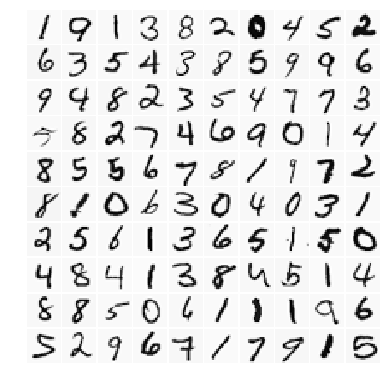

In [13]:
dim = 10

m, n = examples.shape

# generate random sample from the data set to plot
to_plot = examples.loc[np.random.randint(m, size=dim * dim)]

# visualize the numbers
fig = plt.figure(figsize=(5, 5))

gs = gridspec.GridSpec(dim, dim)
gs.update(bottom=0.01, top=0.99, left=0.01, right=0.99, 
          hspace=0.05, wspace=0.05)

indeces = list(to_plot.index.values)
k=0
for i in range(dim):
    for j in range(dim):
        ax = plt.subplot(gs[i, j])
        ax.axis('off')
        ax.imshow(to_plot.loc[indeces[k]].values.reshape(int(np.sqrt(n)), int(np.sqrt(n))).T,
            cmap=plt.get_cmap('Greys'), interpolation='nearest')
        k += 1

<div id='vectorizing'/>

### 1.3 Vectorizing Logistic Regression